### Exploratory Data Analysis of Vegemite Dataset
The Vegemite dataset contains data about vegemite manufacturing settings and results that are determined by the consistency
of the vegemite.

There are 31 settings and 26k records from the .

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [13]:
df = pd.read_csv("./data/merged.csv")

print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

df.columns

Number of rows: 26145
Number of columns: 34


Index(['VYP batch', 'Part', 'Set Time', 'FFTE Feed solids SP',
       'FFTE Production solids SP', 'FFTE Steam pressure SP',
       'TFE Out flow SP', 'TFE Production solids SP', 'TFE Vacuum pressure SP',
       'TFE Steam pressure SP', 'Extract tank Level', 'FFTE Discharge density',
       'FFTE Discharge solids', 'FFTE Feed flow rate PV',
       'FFTE Feed solids PV', 'FFTE Heat temperature 1',
       'FFTE Heat temperature 2', 'FFTE Heat temperature 3',
       'FFTE Production solids PV', 'FFTE Steam pressure PV',
       'TFE Input flow PV', 'TFE Level', 'TFE Motor current',
       'TFE Motor speed', 'TFE Out flow PV', 'TFE Product out temperature',
       'TFE Production solids PV', 'TFE Production solids density',
       'TFE Steam pressure PV', 'TFE Steam temperature', 'TFE Tank level',
       'TFE Temperature', 'TFE Vacuum pressure PV', 'batch'],
      dtype='object')

### Variable Identification

<ul>
<li>Target varible 'batch'</li>
</ul>

### Univariate Analysis

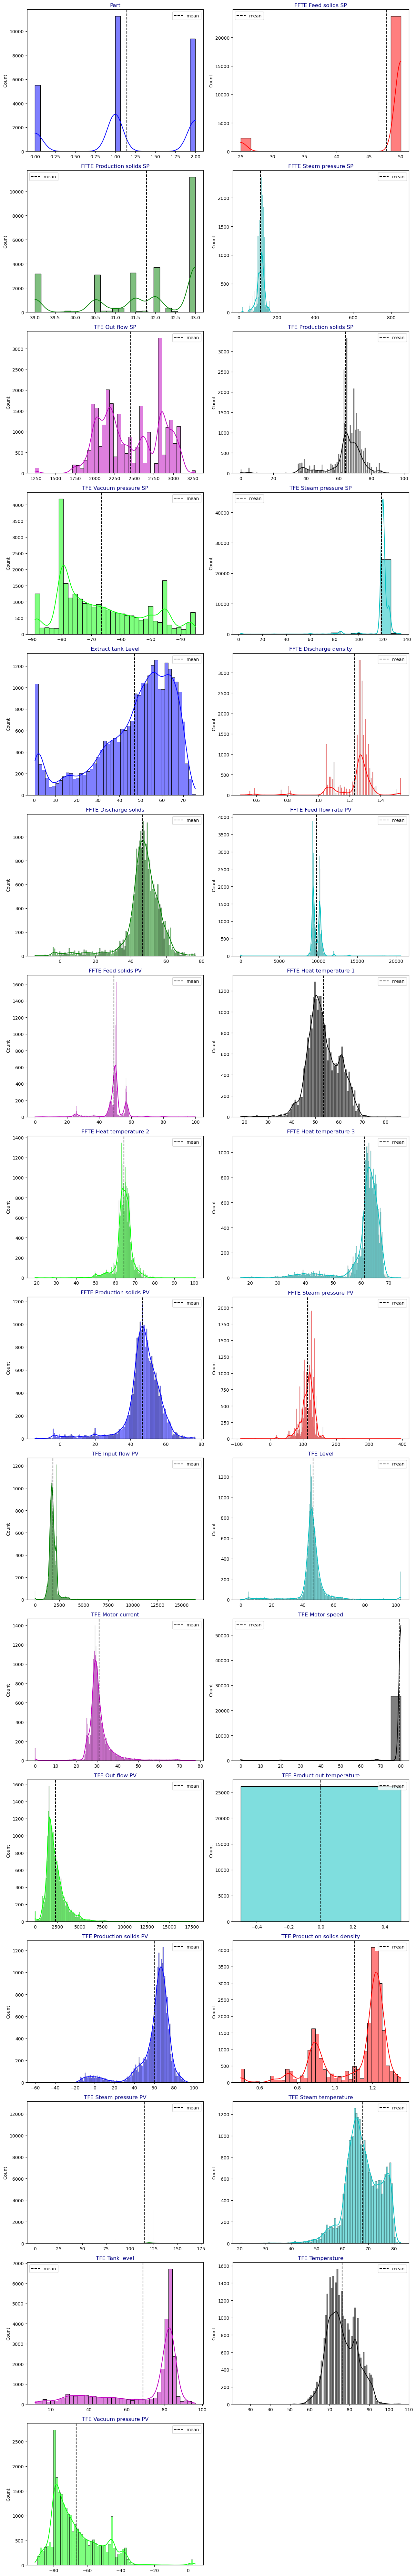

In [22]:

# Get numeric columns excluding 'batch'
cols = [col for col in df.select_dtypes(include='number').columns if col != 'batch']
length = len(cols)
cs = ["b", "r", "g", "c", "m", "k", "lime", "c"]

# Dynamically compute number of rows (2 columns per row)
n_cols = 2
n_rows = math.ceil(length / n_cols)

fig = plt.figure(figsize=(13, n_rows * 5))

for j, (i, k) in enumerate(zip(cols, itertools.cycle(cs))):
    plt.subplot(n_rows, n_cols, j + 1)
    sns.histplot(df[i], color=k, kde=True)
    plt.axvline(df[i].mean(), linestyle="dashed", label="mean", color="k")
    plt.legend(loc="best")
    plt.title(i, color="navy")
    plt.xlabel("")

plt.tight_layout()
plt.show()


#### Batch distribution

/tmp/ipykernel_59350/3069206009.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="best", prop={"size": 10})


<Figure size 1300x600 with 0 Axes>

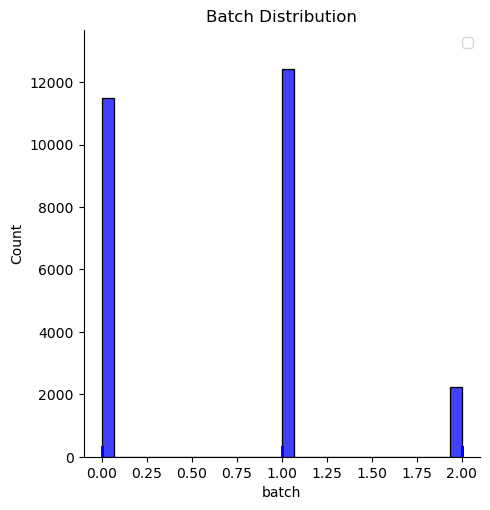

In [26]:
plt.figure(figsize=(13,6))
sns.displot(df["batch"], color="b", rug=True)
plt.legend(loc="best", prop={"size": 10})
plt.title("Batch Distribution")
plt.show()

#### Summary Statistics

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Part,26145.0,1.147562,0.740368,0.00,1.00,1.00,2.00,2.00
FFTE Feed solids SP,26145.0,47.742315,7.147027,25.00,50.00,50.00,50.00,50.00
FFTE Production solids SP,26145.0,41.779682,1.352938,39.00,40.74,42.00,43.00,43.00
FFTE Steam pressure SP,26145.0,114.809304,20.160287,10.00,104.52,118.00,126.50,850.00
TFE Out flow SP,26145.0,2456.069208,386.636266,1240.00,2135.06,2404.65,2846.51,3278.60
TFE Production solids SP,26145.0,64.148102,11.635804,0.00,63.00,65.00,71.00,98.00
TFE Vacuum pressure SP,26145.0,-66.657068,14.213245,-89.00,-79.33,-70.00,-55.63,-35.00
TFE Steam pressure SP,26145.0,118.845262,11.439789,2.00,120.00,120.00,120.00,135.00
Extract tank Level,26145.0,47.187468,18.472277,0.47,37.51,51.87,61.37,75.62
FFTE Discharge density,26145.0,1.233524,0.134685,0.50,1.24,1.27,1.30,1.53


#### Multivariate Analysis

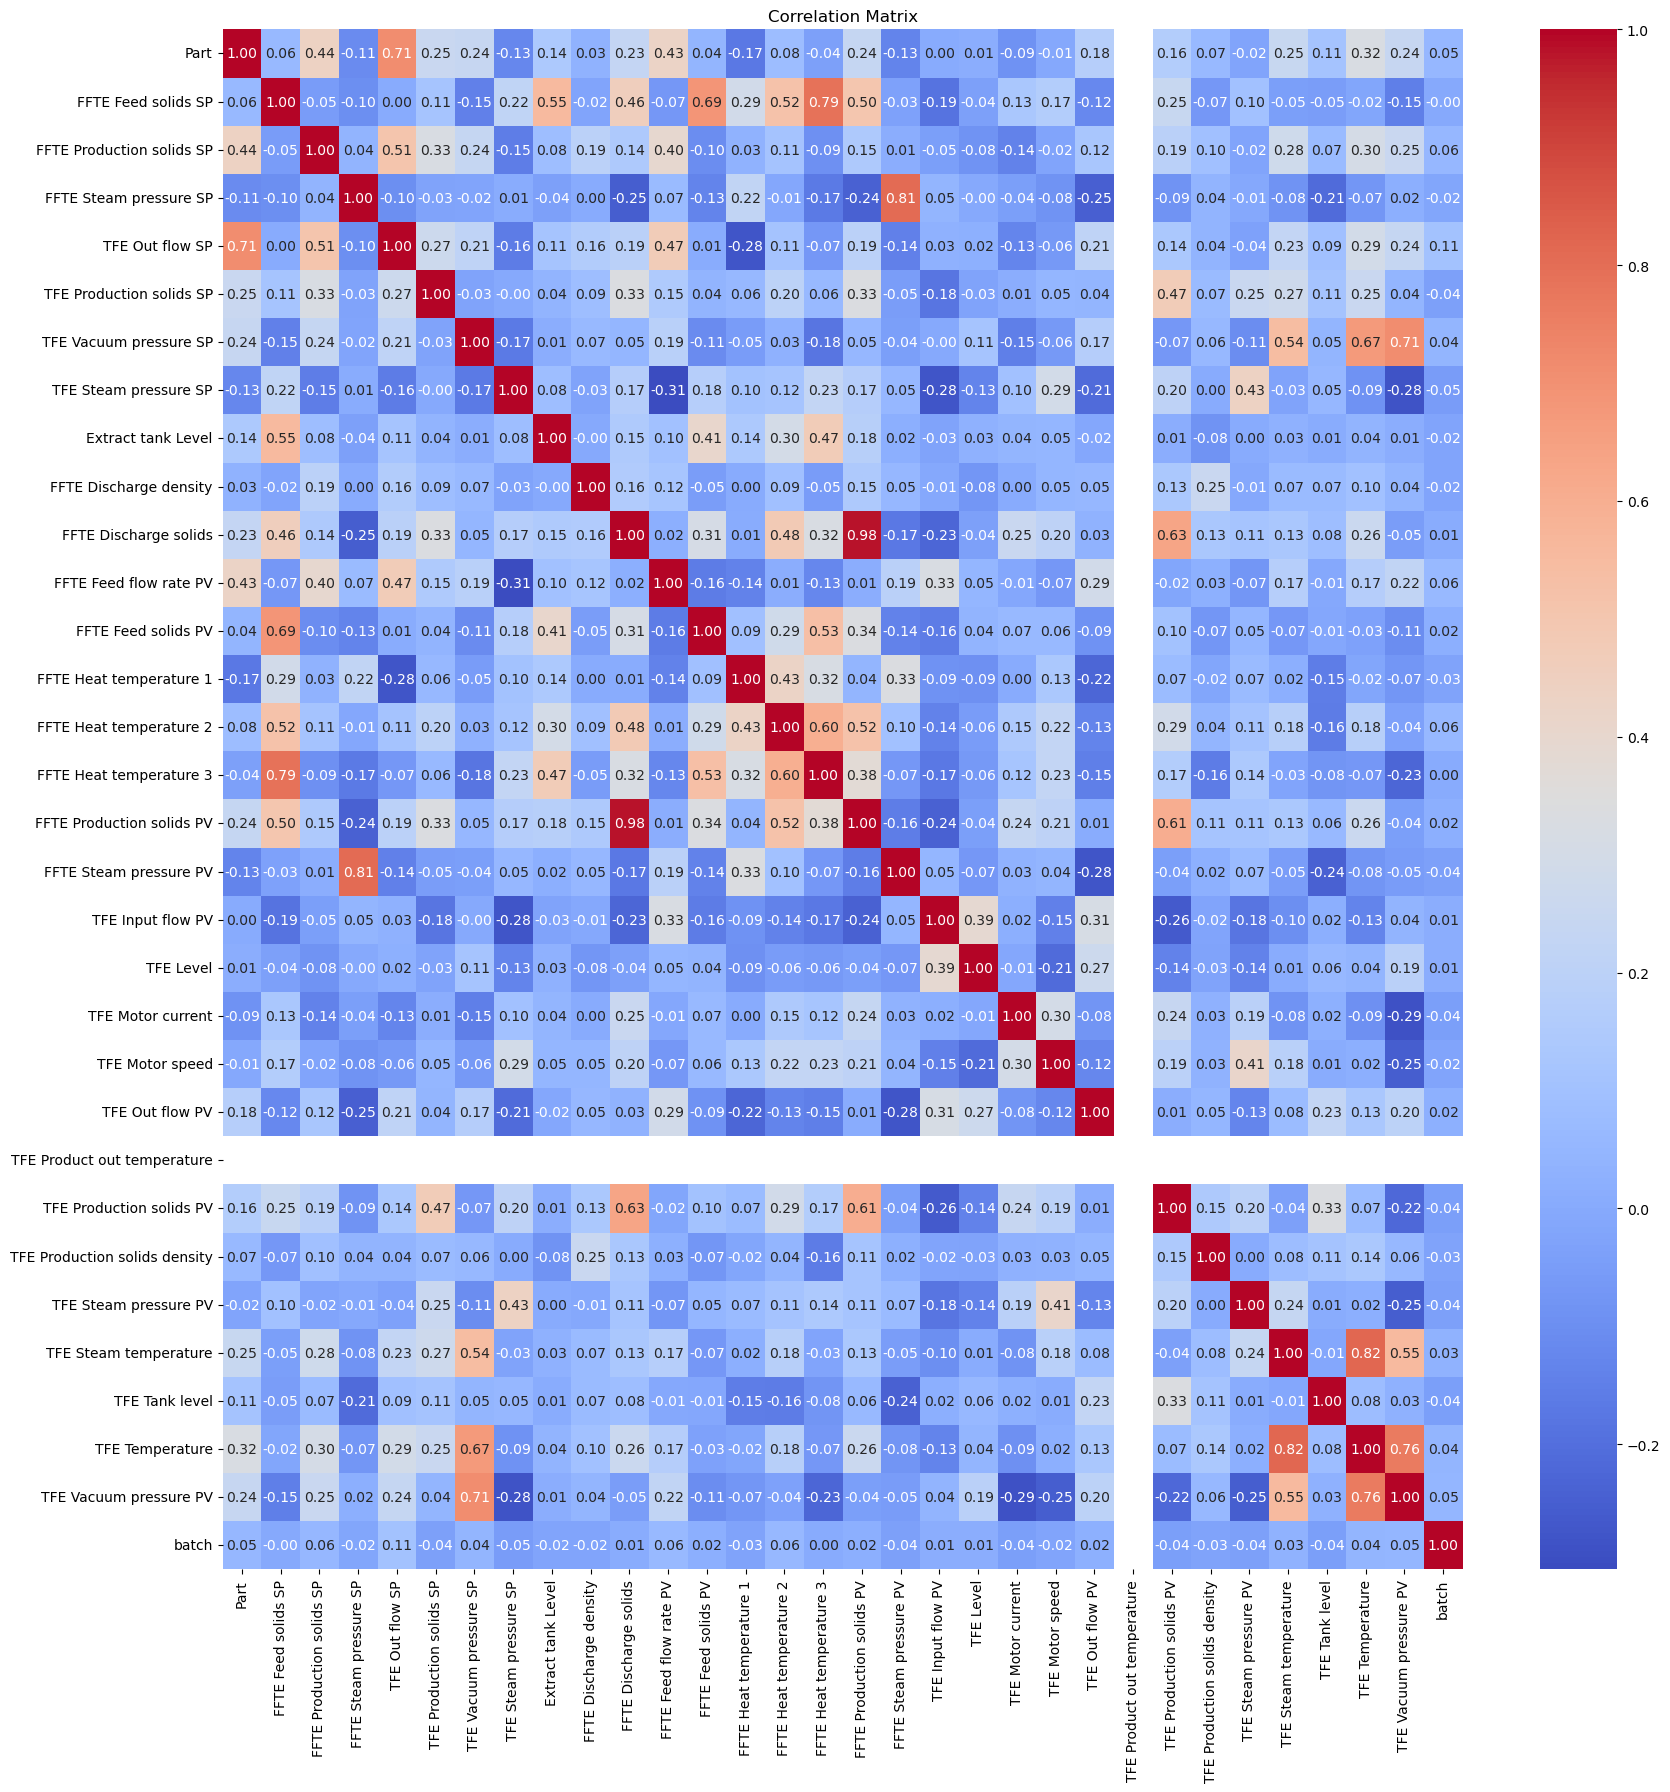

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

#### Data Correlation

In [41]:
df_numeric = df.select_dtypes(include='number')
df_numeric.corr()


,Part,FFTE Feed solids SP,FFTE Production solids SP,FFTE Steam pressure SP,TFE Out flow SP,TFE Production solids SP,TFE Vacuum pressure SP,TFE Steam pressure SP,Extract tank Level,FFTE Discharge density,...,TFE Out flow PV,TFE Product out temperature,TFE Production solids PV,TFE Production solids density,TFE Steam pressure PV,TFE Steam temperature,TFE Tank level,TFE Temperature,TFE Vacuum pressure PV,batch
Part,1.000000,0.062387,0.437481,-0.109784,0.712836,0.250055,0.242002,-0.127544,0.140030,0.032630,...,0.176858,NaN,0.164578,0.065088,-0.022406,0.246573,0.111266,0.322971,0.240963,0.052932
FFTE Feed solids SP,0.062387,1.000000,-0.053139,-0.098606,0.000537,0.114246,-0.147905,0.215298,0.551705,-0.024713,...,-0.119757,NaN,0.245593,-0.070143,0.099345,-0.045887,-0.047588,-0.020069,-0.152397,-0.001174
FFTE Production solids SP,0.437481,-0.053139,1.000000,0.037376,0.510078,0.325782,0.235959,-0.153689,0.084464,0.194865,...,0.122615,NaN,0.193174,0.095972,-0.024969,0.279732,0.066288,0.301831,0.254423,0.055931
FFTE Steam pressure SP,-0.109784,-0.098606,0.037376,1.000000,-0.098835,-0.030519,-0.024262,0.005596,-0.036022,0.004512,...,-0.248236,NaN,-0.085970,0.035648,-0.008334,-0.082009,-0.214455,-0.074199,0.016730,-0.017507
TFE Out flow SP,0.712836,0.000537,0.510078,-0.098835,1.000000,0.268412,0.213636,-0.159103,0.114007,0.160847,...,0.211668,NaN,0.135912,0.037380,-0.035468,0.228477,0.092666,0.293523,0.237497,0.105101
TFE Production solids SP,0.250055,0.114246,0.325782,-0.030519,0.268412,1.000000,-0.030255,-0.001129,0.036453,0.085087,...,0.043449,NaN,0.474263,0.071213,0.254038,0.272490,0.109749,0.254026,0.042679,-0.037414
TFE Vacuum pressure SP,0.242002,-0.147905,0.235959,-0.024262,0.213636,-0.030255,1.000000,-0.167863,0.014561,0.065624,...,0.170288,NaN,-0.066860,0.061063,-0.107132,0.544364,0.045573,0.672128,0.711253,0.044982
TFE Steam pressure SP,-0.127544,0.215298,-0.153689,0.005596,-0.159103,-0.001129,-0.167863,1.000000,0.082802,-0.026980,...,-0.212734,NaN,0.204055,0.002347,0.434526,-0.030111,0.053027,-0.088539,-0.282335,-0.053018
Extract tank Level,0.140030,0.551705,0.084464,-0.036022,0.114007,0.036453,0.014561,0.082802,1.000000,-0.003044,...,-0.015359,NaN,0.014589,-0.084733,0.002091,0.026490,0.007636,0.038273,0.013465,-0.022012
FFTE Discharge density,0.032630,-0.024713,0.194865,0.004512,0.160847,0.085087,0.065624,-0.026980,-0.003044,1.000000,...,0.054477,NaN,0.134883,0.252260,-0.006524,0.066596,0.069253,0.098246,0.041959,-0.024753
